In [179]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [180]:
df=pd.read_csv("iris_dataset.csv")
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [181]:
Class_num_Y=df['target'].unique()
Class_num_Y

array([0, 1, 2])

In [182]:
feature_X=df.columns[:4]
feature_X

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [183]:
dic_feature_mean={}
for col in Class_num_Y:
   class_data=df[df['target']==col]
   dic_feature_mean[col]=class_data[feature_X].mean()
df_mean=pd.DataFrame(dic_feature_mean)
df_mean

,0,1,2
sepal length (cm),5.006,5.936,6.588
sepal width (cm),3.428,2.770,2.974
petal length (cm),1.462,4.260,5.552
petal width (cm),0.246,1.326,2.026


In [184]:
dic_feature_var={}
for col in Class_num_Y:
   class_data=df[df['target']==col]
   dic_feature_var[col]=class_data[feature_X].var()
df_var=pd.DataFrame(dic_feature_var)
df_var

,0,1,2
sepal length (cm),0.124249,0.266433,0.404343
sepal width (cm),0.143690,0.098469,0.104004
petal length (cm),0.030159,0.220816,0.304588
petal width (cm),0.011106,0.039106,0.075433


In [185]:
dic_feature_max={}
for col in Class_num_Y:
   class_data=df[df['target']==col]
   dic_feature_max[col]=class_data[feature_X].max()
df_max=pd.DataFrame(dic_feature_max)
df_max

,0,1,2
sepal length (cm),5.8,7.0,7.9
sepal width (cm),4.4,3.4,3.8
petal length (cm),1.9,5.1,6.9
petal width (cm),0.6,1.8,2.5


In [186]:
dic_feature_min={}
for col in Class_num_Y:
   class_data=df[df['target']==col]
   dic_feature_min[col]=class_data[feature_X].min()
df_min=pd.DataFrame(dic_feature_min)
df_min

,0,1,2
sepal length (cm),4.3,4.9,4.9
sepal width (cm),2.3,2.0,2.2
petal length (cm),1.0,3.0,4.5
petal width (cm),0.1,1.0,1.4


In [187]:
dic_feature_range={}
for col in Class_num_Y:
   class_data=df[df['target']==col]
   dic_feature_range[col]=class_data[feature_X].max()-class_data[feature_X].min()
df_range=pd.DataFrame(dic_feature_range)
df_range

,0,1,2
sepal length (cm),1.5,2.1,3.0
sepal width (cm),2.1,1.4,1.6
petal length (cm),0.9,2.1,2.4
petal width (cm),0.5,0.8,1.1


In [188]:
# third_feature=[]
third_feature=df['petal length (cm)']
third_feature

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal length (cm), Length: 150, dtype: float64

In [189]:
mean_third=df_mean.loc['petal length (cm)']
mean_third

0    1.462
1    4.260
2    5.552
Name: petal length (cm), dtype: float64

In [190]:
var_third=df_var.loc['petal length (cm)']
var_third

0    0.030159
1    0.220816
2    0.304588
Name: petal length (cm), dtype: float64

In [191]:
def Probability_func(x,mean_1,var_1):
    std_1 = math.sqrt(var_1)
    z=(-1/2)*((x-mean_1)/std_1)**2
    t=math.exp(z)
    u=1/(std_1*2 * math.pi )
    Probability_function=u*t
    return(Probability_function)

In [192]:
x_sample=df['petal length (cm)'][45]
sample_class = df['target'][45]
x_mean=df_mean.loc['petal length (cm)',sample_class]
x_var=df_var.loc['petal length (cm)',sample_class]
[x_sample,x_mean,x_var]

[np.float64(1.4),
 np.float64(1.4620000000000002),
 np.float64(0.030159183673469384)]

In [193]:
# df[['petal length (cm)', 'target']].head(60)


In [194]:
p_df_0=[Probability_func(x,mean_third[0],var_third[0])for x in df['petal length (cm)']]
p_df_1=[Probability_func(x,mean_third[1],var_third[1])for x in df['petal length (cm)']]
p_df_2=[Probability_func(x,mean_third[2],var_third[2])for x in df['petal length (cm)']]
[p_df_0],[p_df_1],[p_df_2]

([[0.8598711896744933,
   0.8598711896744933,
   0.593133655280024,
   0.8947742697879408,
   0.8598711896744933,
   0.358320322081994,
   0.8598711896744933,
   0.8947742697879408,
   0.8598711896744933,
   0.8947742697879408,
   0.8947742697879408,
   0.6683328901786023,
   0.8598711896744933,
   0.10437312351944175,
   0.2936777165883427,
   0.8947742697879408,
   0.593133655280024,
   0.8598711896744933,
   0.358320322081994,
   0.8947742697879408,
   0.358320322081994,
   0.8947742697879408,
   0.026625981420711632,
   0.358320322081994,
   0.03809135533978286,
   0.6683328901786023,
   0.6683328901786023,
   0.8947742697879408,
   0.8598711896744933,
   0.6683328901786023,
   0.6683328901786023,
   0.8947742697879408,
   0.8947742697879408,
   0.8598711896744933,
   0.8947742697879408,
   0.2936777165883427,
   0.593133655280024,
   0.8598711896744933,
   0.593133655280024,
   0.8947742697879408,
   0.593133655280024,
   0.593133655280024,
   0.593133655280024,
   0.6683328901786

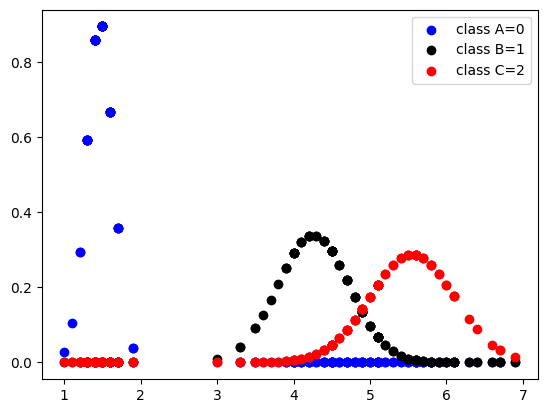

In [195]:
plt.scatter(df['petal length (cm)'],p_df_0,label='class A=0',c='blue')
plt.scatter(df['petal length (cm)'],p_df_1,label='class B=1',c='black')
plt.scatter(df['petal length (cm)'],p_df_2,label='class C=2',c='red')
plt.legend()
plt.show()

In [196]:
list_pr=[]
val=[]
for i in range(len(df)):
    p0 = p_df_0[i]
    p1 = p_df_1[i]
    p2 = p_df_2[i]
    pre=np.argmax([p0,p1,p2])
    list_pr.append(pre)
    values=np.array([p0,p1,p2])
    val.append(values[np.argmax([p0,p1,p2])])
    

In [197]:
df_lis=pd.DataFrame(val)
df_lis['target']=list_pr
df_lis

,0,target
0,0.859871,0
1,0.859871,0
2,0.593134,0
3,0.894774,0
4,0.859871,0
...,...,...
145,0.235304,2
146,0.174877,2
147,0.235304,2
148,0.277647,2


In [198]:
# pr=[p_df_1,p_df_1,p_df_2]
# predicted_class =pr.index(max(pr))
# print("maximum class possibility:",predicted_class)

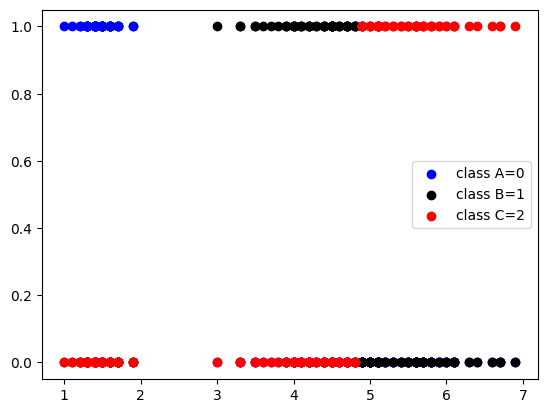

In [199]:
plt.scatter(df['petal length (cm)'],df_lis['target']==0,label='class A=0',c='blue')
plt.scatter(df['petal length (cm)'],df_lis['target']==1,label='class B=1',c='black')
plt.scatter(df['petal length (cm)'],df_lis['target']==2,label='class C=2',c='red')
plt.legend()
plt.show()

In [200]:
list_p=[]
for i in range(len(df)):
    x=df['petal length (cm)'][i]
    true_list=df['target'][i]
    p0 = p_df_0[i]
    p1 = p_df_1[i]
    p2 = p_df_2[i]
    pred=np.argmax([p0,p1,p2])
    list_p.append(pred) 
list_p=np.array(list_p)
accuracy=(np.sum(list_p==df['target'])/len(df))*100
accuracy
# type(true_list)

np.float64(95.33333333333334)

In [201]:
df_test=pd.read_csv("iris_test_samples.csv")
df_test

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.4,1.5,0.2,0
1,4.9,2.9,1.4,0.1,0
2,5.4,3.9,1.7,0.4,0
3,6.1,2.8,4.0,1.3,1
4,5.9,3.0,4.2,1.5,1
5,6.4,3.1,4.7,1.4,1
6,6.9,3.2,5.5,2.0,2
7,6.5,3.0,5.8,2.2,2
8,7.1,3.0,5.9,2.1,2
9,6.8,2.8,5.1,1.9,2


In [202]:
preds_test=[]
for i in range(len(df_test)):
    x=df_test['petal_length'][i]
    p_test_0=Probability_func(x,mean_third[0],var_third[0])
    p_test_1=Probability_func(x,mean_third[1],var_third[1])
    p_test_2=Probability_func(x,mean_third[2],var_third[2])
    pred_test = np.argmax([p_test_0, p_test_1, p_test_2])
    preds_test.append(pred_test)
preds_test=np.array(preds_test)
labels=df_test['label'].values
accuracy_test = np.mean(preds_test == labels)
accuracy_test

np.float64(1.0)

دقت 100%

In [203]:
Fourth_feature=df['petal width (cm)']
Fourth_feature

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal width (cm), Length: 150, dtype: float64

In [204]:
mean_Fourth=df_mean.loc['petal width (cm)']
mean_Fourth

0    0.246
1    1.326
2    2.026
Name: petal width (cm), dtype: float64

In [205]:
var_Fourth=df_var.loc['petal width (cm)']
var_Fourth

0    0.011106
1    0.039106
2    0.075433
Name: petal width (cm), dtype: float64

In [207]:

preds_end=[]
p_end=[]
for i in range(len(df)):
    x=df['petal length (cm)'][i]
    y=df['petal width (cm)'][i]
    p_x_0=Probability_func(x,mean_third[0],var_third[0])
    p_x_1=Probability_func(x,mean_third[1],var_third[1])
    p_x_2=Probability_func(x,mean_third[2],var_third[2])
    p_y_0=Probability_func(y,mean_Fourth[0],var_Fourth[0])
    p_y_1=Probability_func(y,mean_Fourth[1],var_Fourth[1])
    p_y_2=Probability_func(y,mean_Fourth[2],var_Fourth[2])
    p_end_0=(p_x_0+p_y_0)/2
    p_end_1=(p_x_1+p_y_1)/2
    p_end_2=(p_x_2+p_y_2)/2
    pred_end = np.argmax([p_end_0,p_end_1,p_end_2])
    preds_end.append(pred_end)
preds_end=np.array(preds_end)
labels=df['target'].values
accuracy_end = np.mean(preds_end == labels)
accuracy_end


np.float64(0.9533333333333334)

دقت 95%

In [ ]:
First_feature=df['sepal length (cm)']
First_feature

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal width (cm), Length: 150, dtype: float64

In [217]:
mean_first=df_mean.loc["sepal length (cm)"]
mean_first

0    5.006
1    5.936
2    6.588
Name: sepal length (cm), dtype: float64

In [218]:
var_first=df_var.loc['sepal length (cm)']
var_first

0    0.124249
1    0.266433
2    0.404343
Name: sepal length (cm), dtype: float64

In [219]:
second_feature=df['sepal width (cm)']
second_feature

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

In [220]:
mean_second=df_mean.loc["sepal width (cm)"]
mean_second

0    3.428
1    2.770
2    2.974
Name: sepal width (cm), dtype: float64

In [221]:

var_second=df_var.loc['sepal width (cm)']
var_second

0    0.143690
1    0.098469
2    0.104004
Name: sepal width (cm), dtype: float64

In [ ]:

preds_10 = []

for i in range(len(df)):

    # مقدار x برای 4 فیچر
    sl = df['sepal length (cm)'][i]
    sw = df['sepal width (cm)'][i]
    pl = df['petal length (cm)'][i]
    pw = df['petal width (cm)'][i]
    p0 = [
        Probability_func(sl, mean_first[0], var_first[0]),
        Probability_func(sw, mean_second[0], var_second[0]),
        Probability_func(pl, mean_third[0], var_third[0]),
        Probability_func(pw, mean_Fourth[0], var_Fourth[0])
    ]
    p1 = [
        Probability_func(sl, mean_first[1], var_first[1]),
        Probability_func(sw, mean_second[1], var_second[1]),
        Probability_func(pl, mean_third[1], var_third[1]),
        Probability_func(pw, mean_Fourth[1], var_Fourth[1])
    ]

    p2 = [
        Probability_func(sl, mean_first[2], var_first[2]),
        Probability_func(sw, mean_second[2], var_second[2]),
        Probability_func(pl, mean_third[2], var_third[2]),
        Probability_func(pw, mean_Fourth[2], var_Fourth[2])
    ]

    final_p0 = np.mean(sorted(p0, reverse=True)[:2])
    final_p1 = np.mean(sorted(p1, reverse=True)[:2])
    final_p2 = np.mean(sorted(p2, reverse=True)[:2])

    pred = np.argmax([final_p0, final_p1, final_p2])
    preds_10.append(pred)
preds_10 = np.array(preds_10)
accuracy_10 = np.mean(preds_10 == df['target'].values)

accuracy_10

np.float64(0.9333333333333333)